In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [10]:
class_weights = {0:40 , 1: 65}

In [5]:
import pandas as pd
df=pd.read_csv("h_final.csv")

In [6]:
df.head()

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,0,0,0,7,2015,7,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,13,2015,7,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,0,0,14,2015,7,2,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,3,0,0,14,2015,7,2,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,4,0,0,0,2015,7,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_var = df.drop(['is_canceled'], axis=1).iloc[:,1:]
test_var = df['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(train_var, test_var, test_size=0.20)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((94670, 53), (94670,), (23668, 53), (23668,))

In [8]:
#Data Scaling
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
X_train_mm = mm_scaler.transform(X_train)
X_test_mm = mm_scaler.transform(X_test)

In [1]:
# define weight hyperparameter
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]
hyperparam_grid = {"class_weight": w }



In [9]:
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV

log=LogisticRegression()
params = {
    'C': [100,10,1.0,0.1,0.01],                     
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    "penalty":["l1","l2"],
    
}


lr = RandomizedSearchCV(estimator = log, 
                              param_distributions = params, 
                              n_iter=500,
                              verbose=2, 
                              cv = 5,  
                              n_jobs = -1)

# Fit the random search model
lr.fit(X_train_std, y_train)


# print the best parameters
print(lr.best_params_)

y_pred = lr.predict(X_test_std)

print(f"This best score is : {lr.best_score_}")
clf_report = classification_report(y_test, y_pred)
print(f"Classification Report : \n{clf_report}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Users/faridasimaika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/faridasimaika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/faridasimaika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/faridasimaika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/faridasimaika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/far

/Users/faridasimaika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/faridasimaika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/faridasimaika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/faridasimaika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/faridasimaika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/far

[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.1s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=  13.7s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   5.3s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   6.5s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   2.9s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   7.8s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   5.9s
[CV] END ......................C=100, penalty=l2, solver=sag; total time=  10.1s
[CV] END .....................C=100, penalty=l2, solver=saga; total time=  10.1s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=  25.2s
[CV] END ......................C=10, penalty=l1, solver=saga; total time=  13.0s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   4.1s
[CV] END .................C=

[CV] END ....................C=100, penalty=l1, solver=lbfgs; total time=   0.1s
[CV] END ......................C=100, penalty=l1, solver=sag; total time=   0.1s
[CV] END ......................C=100, penalty=l1, solver=sag; total time=   0.1s
[CV] END .....................C=100, penalty=l1, solver=saga; total time=  11.7s
[CV] END .....................C=100, penalty=l1, solver=saga; total time=  12.1s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   3.2s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   1.6s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   9.4s
[CV] END ......................C=100, penalty=l2, solver=sag; total time=  10.4s
[CV] END .....................C=100, penalty=l2, solver=saga; total time=  10.1s
[CV] END .....................C=100, penalty=l2, solver=saga; total time=  11.2s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=  24.6s
[CV] END ...................

/Users/faridasimaika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/faridasimaika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/faridasimaika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/faridasimaika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.1s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=13.0min
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.1s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=13.1min
[CV] END ....................C=100, penalty=l1, solver=lbfgs; total time=   0.1s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=13.3min
[CV] END ....................C=100, penalty=l1, solver=lbfgs; total time=   0.1s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=13.6min
{'solver': 'liblinear', 'penalty': 'l1', 'C': 100}
This best score is : 0.7993345304742792
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.91      0.85     14795
           1       0.80      0.60      0.69      8873

    accuracy                           0.79     23668
   macro avg      

In [10]:
lr1 = LogisticRegression(C=0.1, solver='liblinear', max_iter=500,penalty="l1",class_weight=class_weights)

In [11]:
# Fit the random search model
lr1.fit(X_train_std, y_train)


# print the best parameters

y_pred = lr1.predict(X_test_std)
print(f"This best score is : {lr1.score(X_test_std, y_test)}")
clf_report = classification_report(y_test, y_pred)
print(f"Classification Report : \n{clf_report}")

This best score is : 0.7943636978198412
Classification Report : 
              precision    recall  f1-score   support

           0       0.84      0.83      0.83     14741
           1       0.72      0.74      0.73      8927

    accuracy                           0.79     23668
   macro avg       0.78      0.78      0.78     23668
weighted avg       0.80      0.79      0.79     23668



<AxesSubplot:>

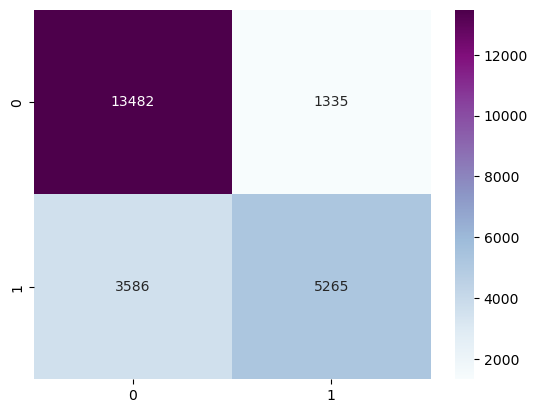

In [128]:
confusion = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(confusion)
sns.heatmap(df_cm, annot=True,fmt="g",cmap="BuPu")

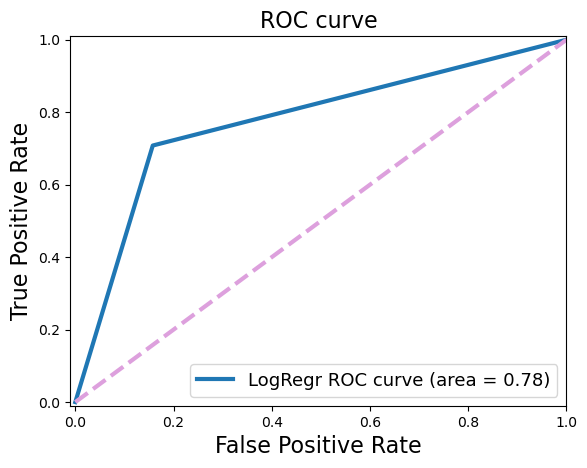

In [133]:
from sklearn.metrics import roc_curve, roc_auc_score, recall_score, precision_score, confusion_matrix, auc
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='plum', lw=3, linestyle='--')
plt.show()

In [119]:
from joblib import load, dump

# train the model
lr1.fit(X_train_std, y_train)
# store model
dump(lr1, 'h_app_final.joblib')

['h_app_final.joblib']